# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [4]:
%%time
path = input_file_directory + "mefs/mefs_seahorse_data/ecar/experiment_2/normalized/ecar_2expNorm.csv"
ecar_expNorm = pandas.read_csv(path, sep = ";")
ecar_expNorm = ecar_expNorm.rename(columns = {'Unnamed: 0':'Time'})
ecar_expNorm = ecar_expNorm.apply(lambda x: x.str.replace(',','.'))
ecar_expNorm = ecar_expNorm.astype(float)
print(ecar_expNorm.shape)
ecar_expNorm.head(2)

(15, 61)
Wall time: 48 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.31,24.38,24.75,7.24,27.0,31.94,23.07,31.09,23.32,34.18,...,44.17,47.80,20.55,30.83,18.79,15.11,20.35,22.36,14.81,18.64
1,7.77,23.14,23.29,7.23,24.1,30.37,23.25,31.48,23.07,32.63,...,43.67,43.52,17.86,29.38,17.81,12.80,19.48,21.70,15.57,17.07


In [5]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


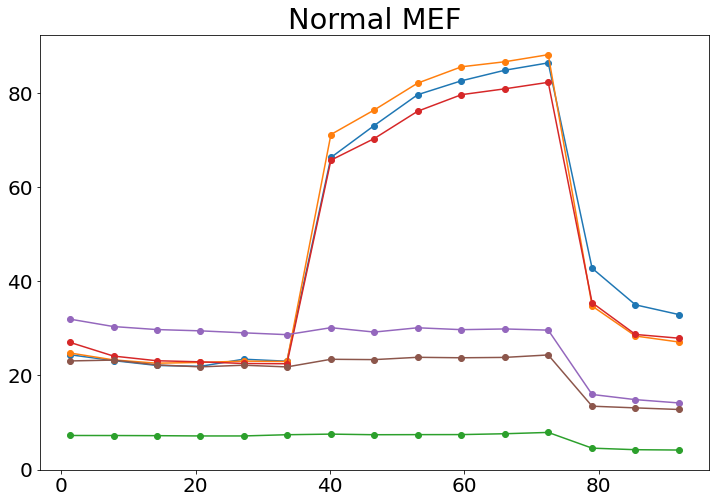

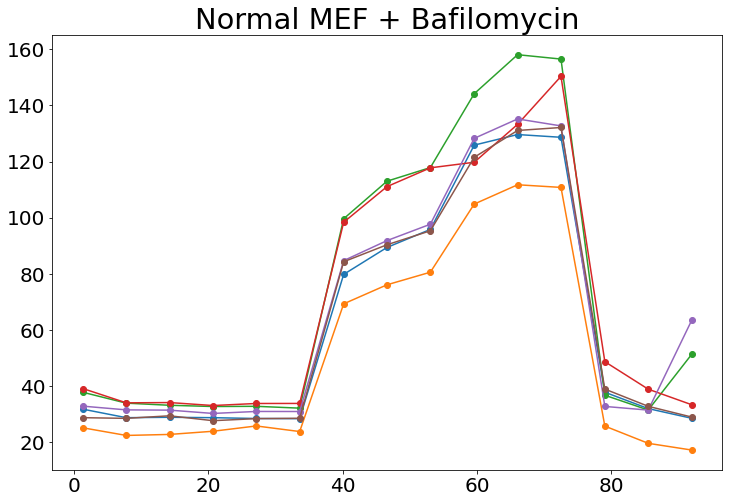

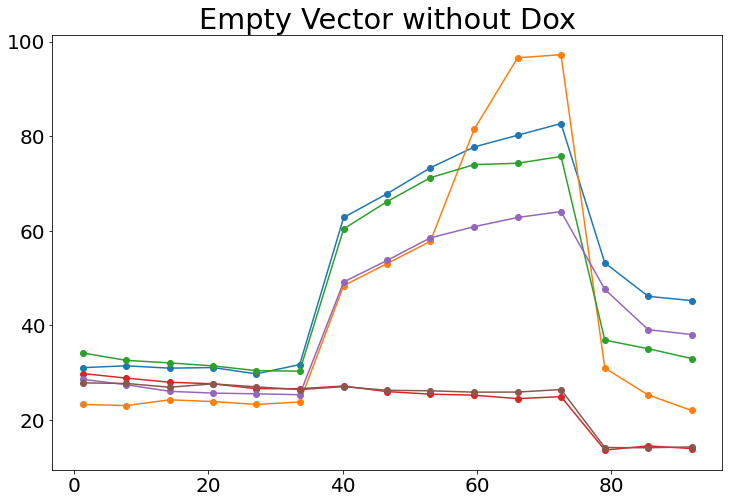

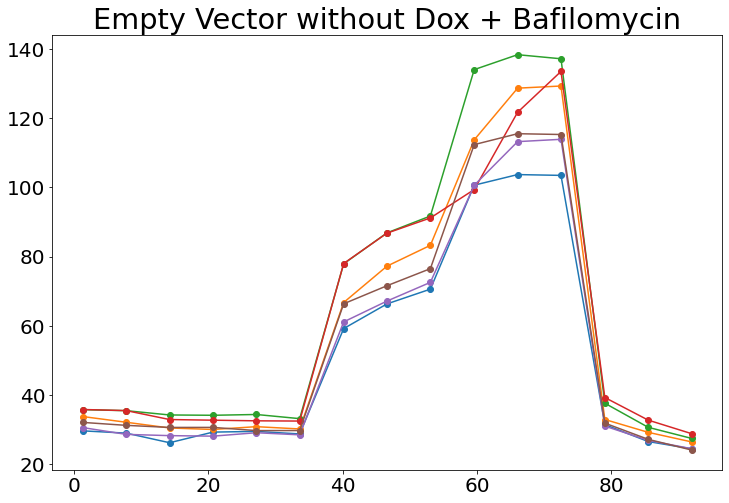

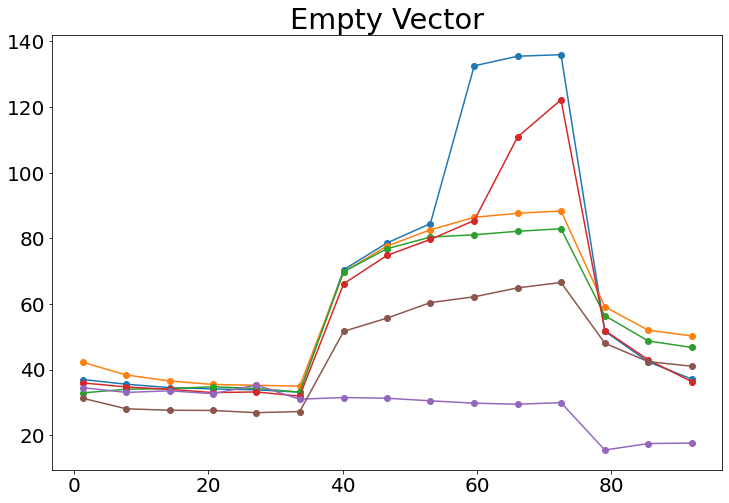

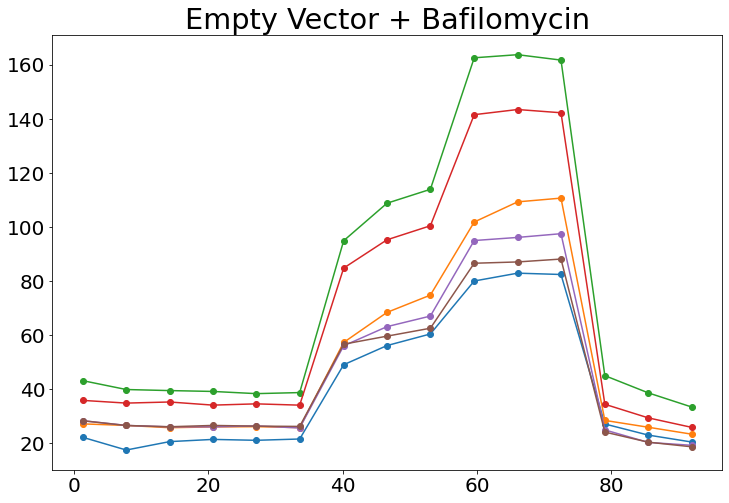

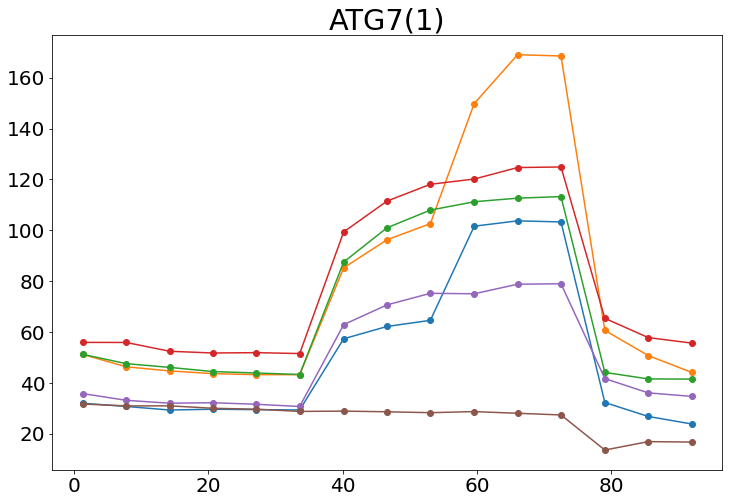

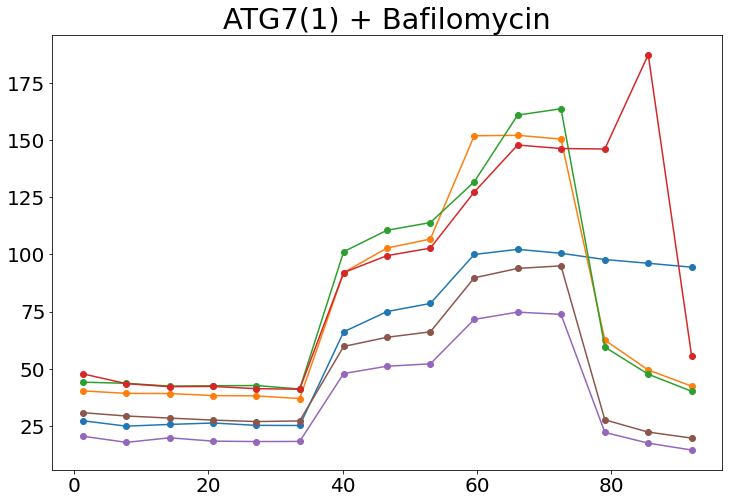

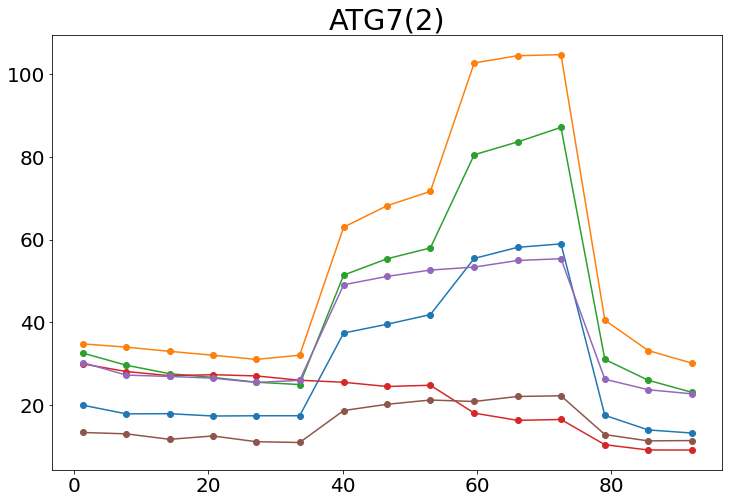

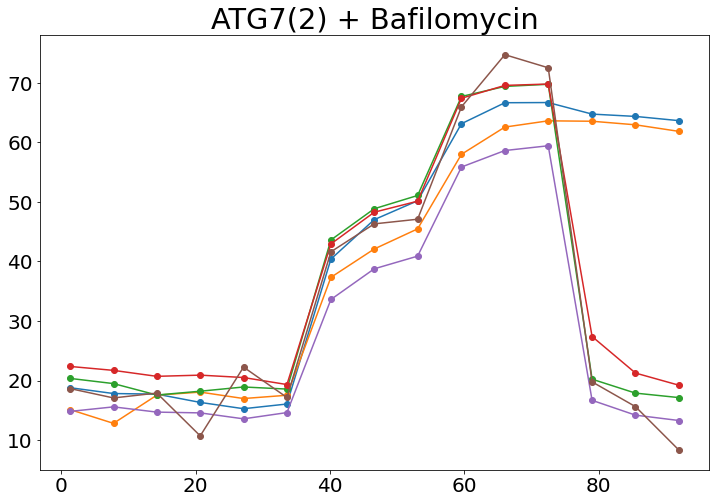

<Figure size 864x576 with 0 Axes>

In [6]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ecar_expNorm['Time'], ecar_expNorm[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [7]:
#define the wells for each condition after removing bad wells 
normal = ['B02','C02','E02']
ev_nodox = ['B03','D03','F03']
ev = ['B04','C04','D04','E04','G04']
wt1 = ['B05','C05','D05','E05','F05']
wt2 = ['B06','C06','D06','F06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['C09','D09','F09','G09']
wt1_baf = ['C10','D10','F10','G10']
wt2_baf = ['D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


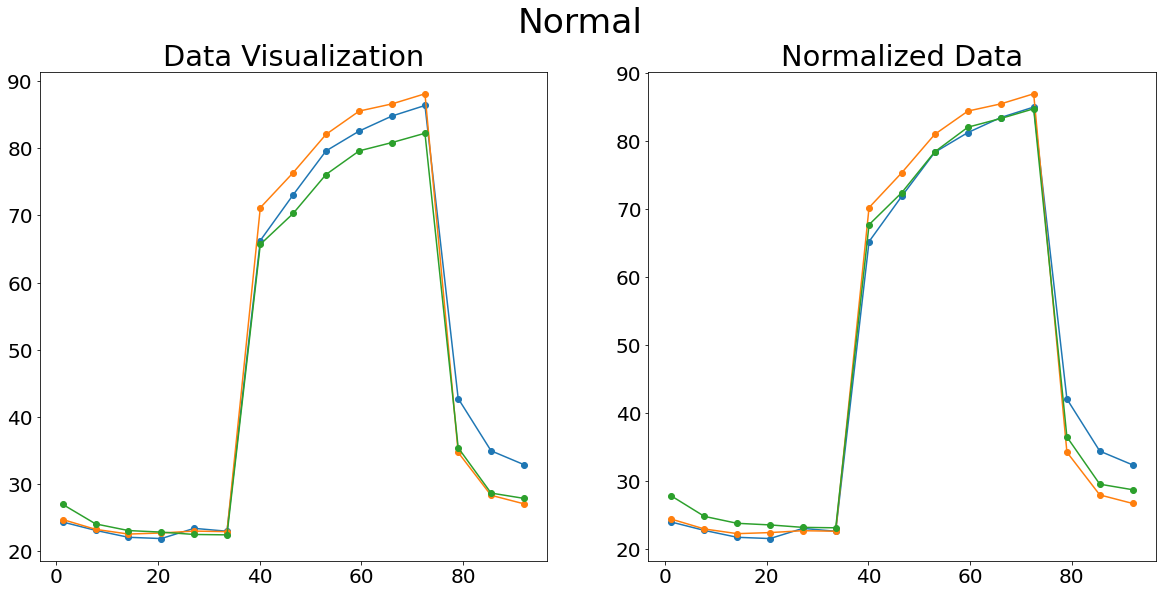

<Figure size 864x576 with 0 Axes>

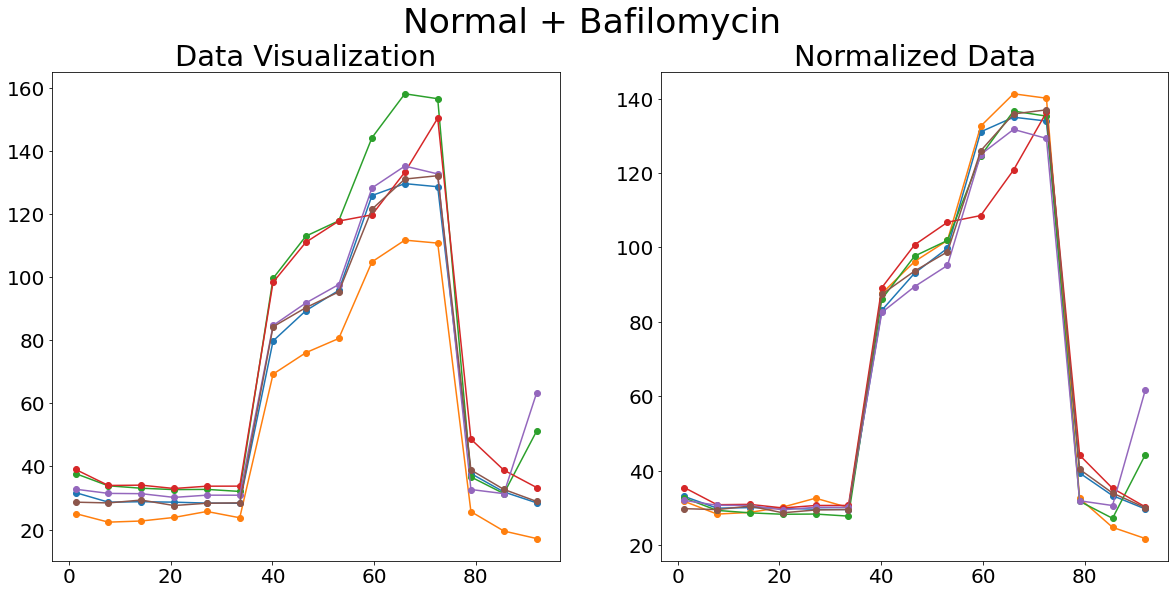

<Figure size 864x576 with 0 Axes>

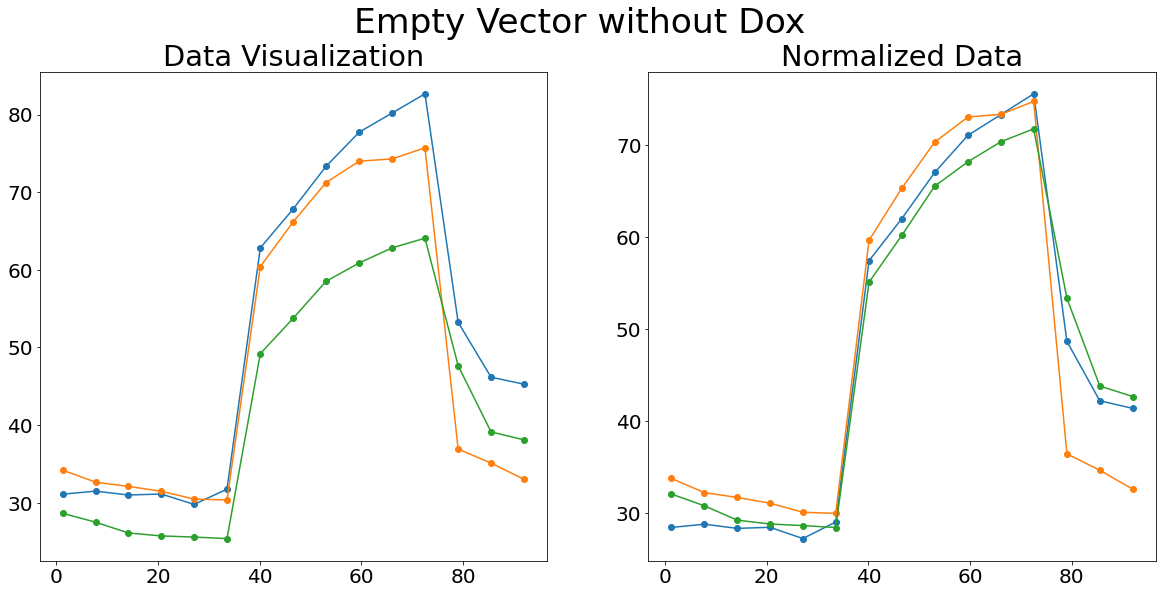

<Figure size 864x576 with 0 Axes>

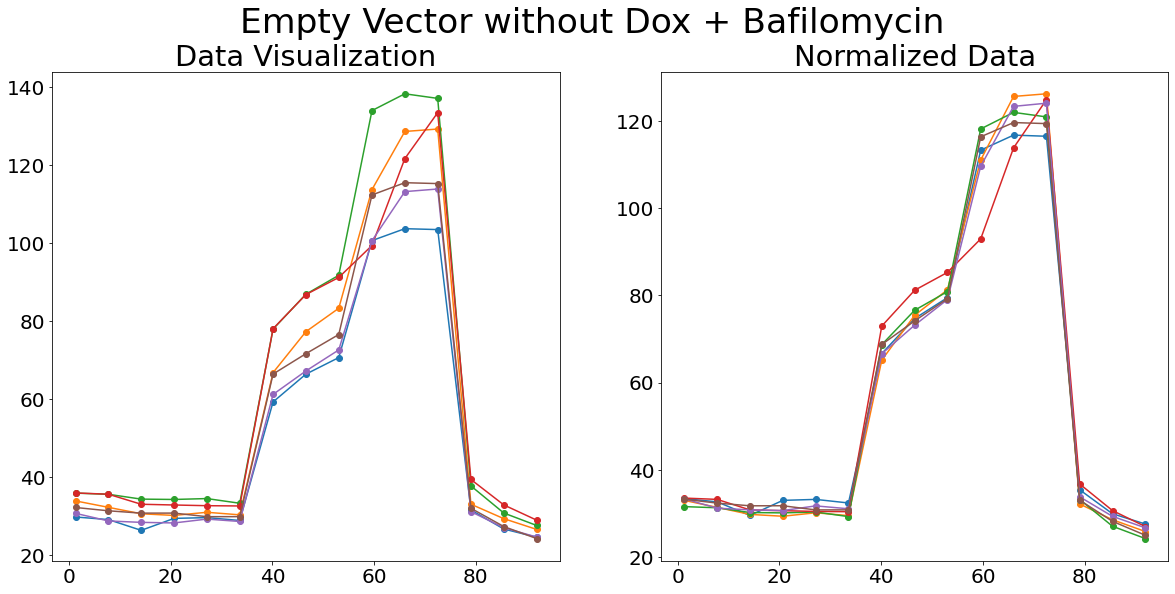

<Figure size 864x576 with 0 Axes>

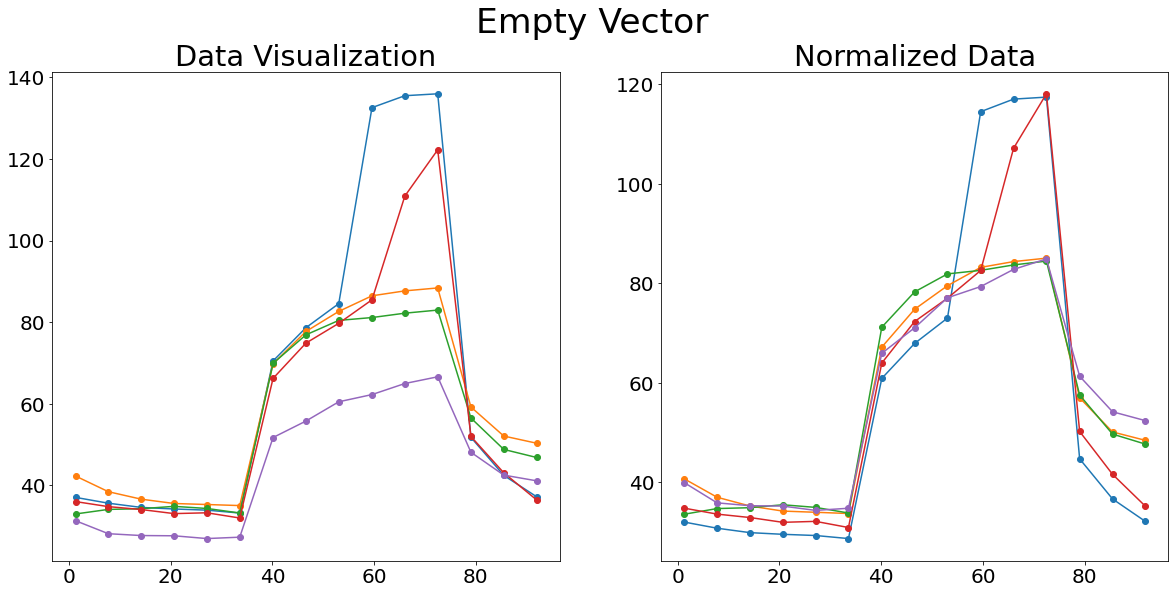

<Figure size 864x576 with 0 Axes>

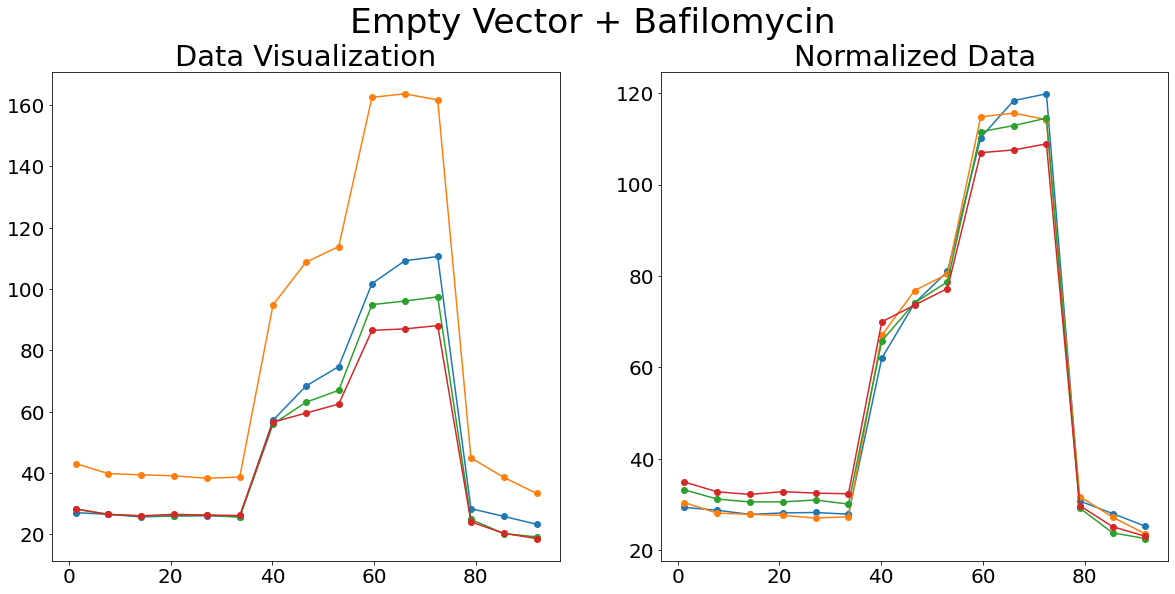

<Figure size 864x576 with 0 Axes>

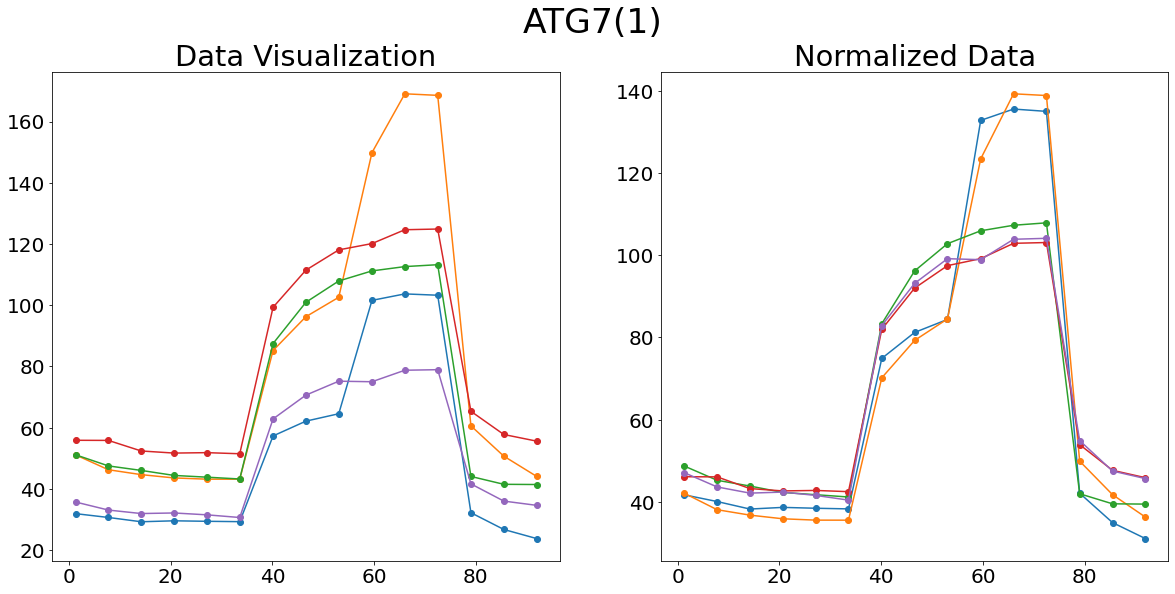

<Figure size 864x576 with 0 Axes>

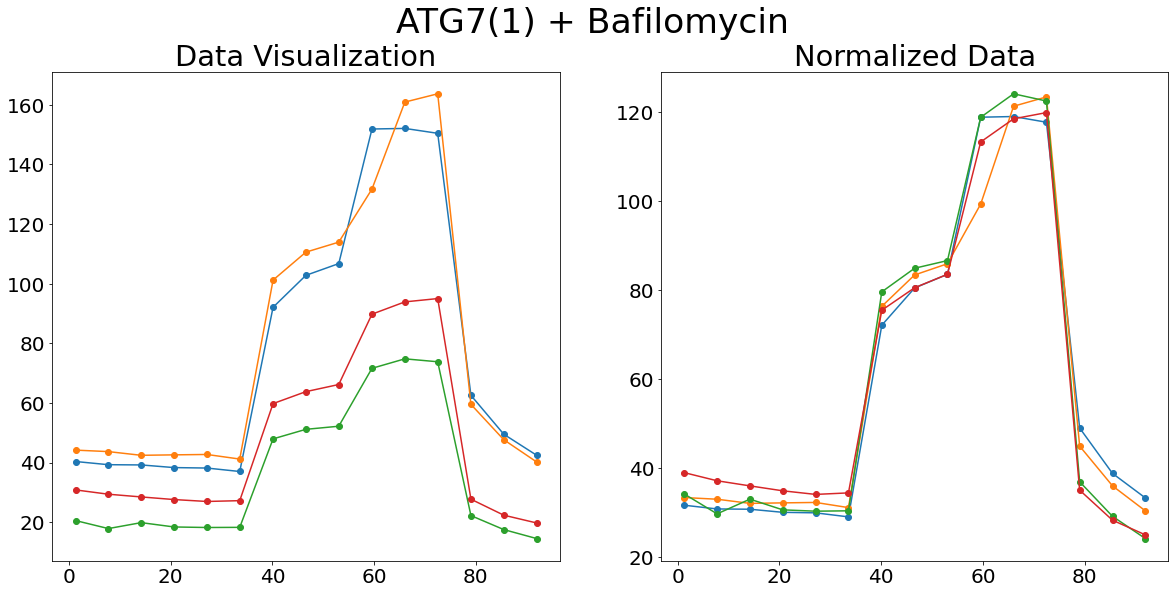

<Figure size 864x576 with 0 Axes>

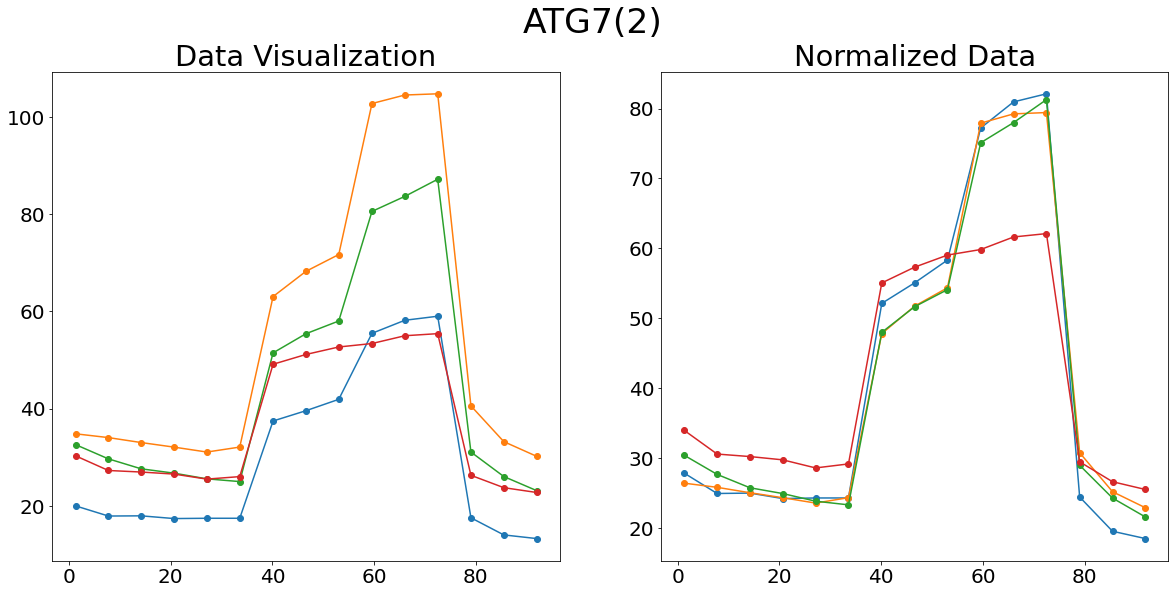

<Figure size 864x576 with 0 Axes>

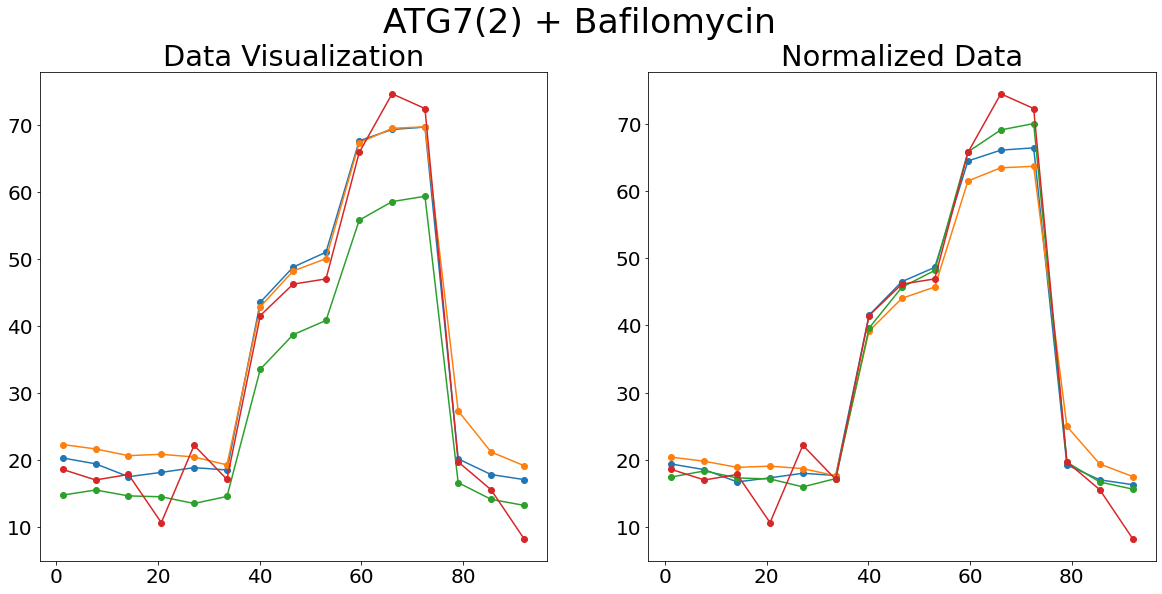

<Figure size 864x576 with 0 Axes>

In [8]:
#Normalization of the data after removing bad wells
all_data = [[normal, 'Normal'], [normal_baf, 'Normal + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ecar_expNorm['Time'], ecar_expNorm[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ecar_expNorm[data[0]].mean()
    general_mean = ecar_expNorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ecar_expNorm[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ecar_expNorm['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


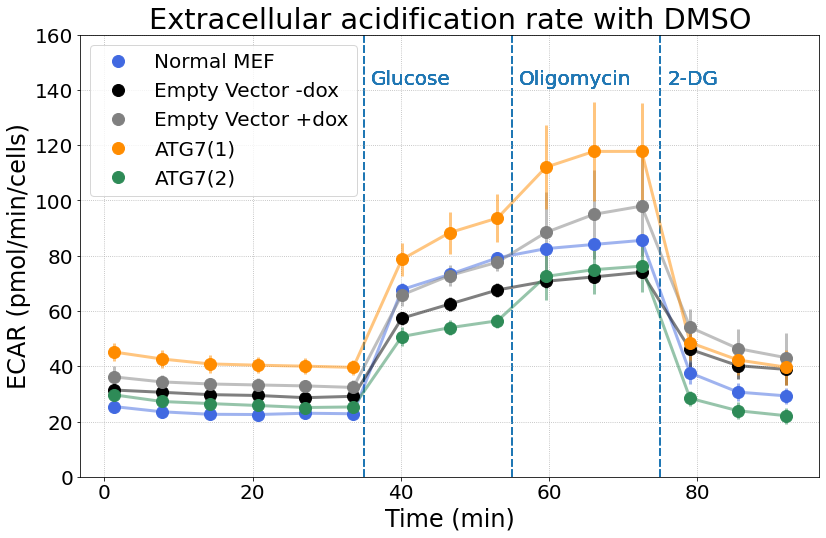

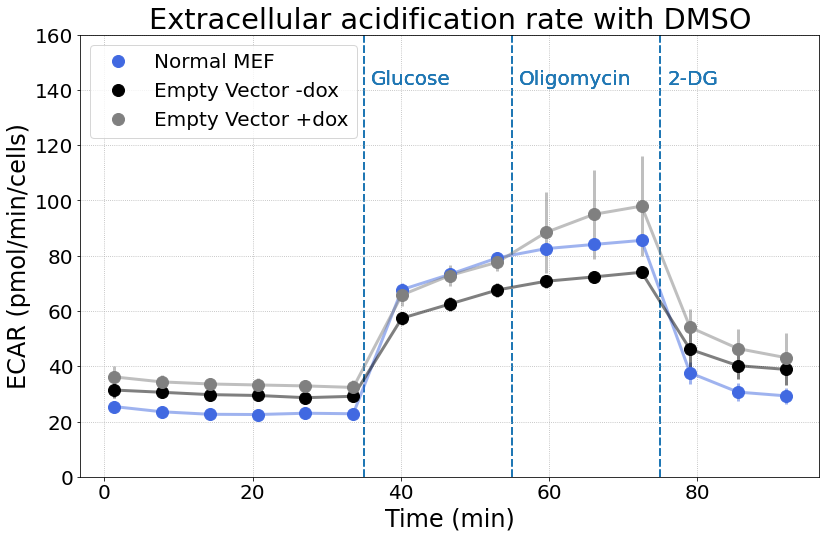

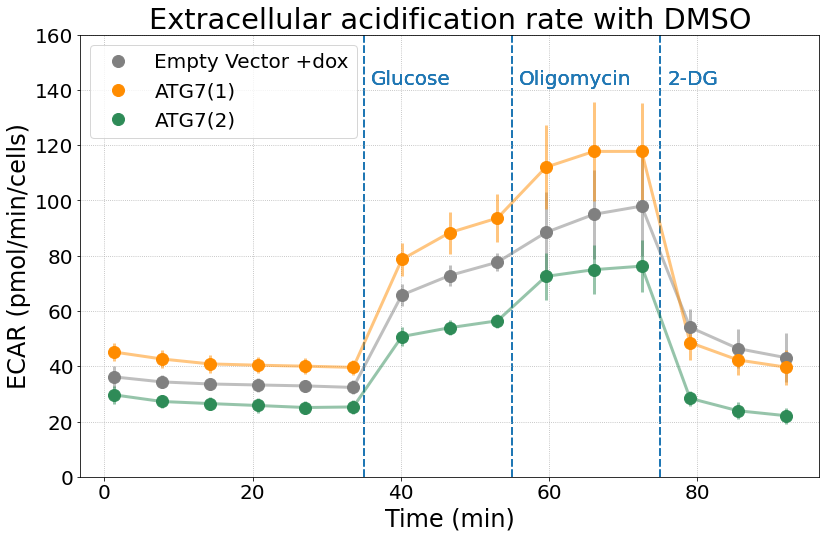

<Figure size 864x576 with 0 Axes>

In [9]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[normal, 'Normal MEF', "royalblue"],
              [ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],            
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ecar_expNorm[sample_labels].mean()
        general_mean = ecar_expNorm[sample_labels].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ecar_expNorm[sample_labels]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ecar_expNorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ecar_expNorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 142, 'Glucose', color='tab:blue',fontsize=20)
        matplotlib.pyplot.text(56, 142, 'Oligomycin', color='tab:blue',fontsize=20)
        matplotlib.pyplot.text(76, 142, '2-DG', color='tab:blue',fontsize=20)

        ##settings
        matplotlib.pyplot.title('Extracellular acidification rate with DMSO')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('ECAR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2,fontsize=20)
        matplotlib.pyplot.ylim([0, 160])
        matplotlib.pyplot.tight_layout()
        
        # save the last graph
        path = 'ATG7/Seahorse_results/seahorse_ECAR/'
        text_file = 'graph_represent_exp2_dmso'
        plt.savefig(output_file_directory+path+text_file+'.svg')
    plt.show()
    plt.clf()
    


In [17]:
#data preparation 
all_data = [[wt2_baf, 'ATG7(2)', "seagreen"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [normal_baf, 'Normal MEF', "royalblue"]]

stats_data = ecar_expNorm.iloc[9:12, :]
stats_data.reset_index(inplace = True, drop= True)

for data in all_data:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        
        df = stats_data[sample_labels]
        df[name_val] = df.mean(axis= 1)
        col = df.pop(name_val)
        stats_data.insert(1, name_val, col)

stats_data = stats_data.iloc[:, :6]

path = 'ATG7/Seahorse_results/seahorse_ECAR/'
stats_data.to_csv(output_file_directory+path+'ecar_exp2_df_dmso.csv', header=True, index=False, sep=',')
stats_data

<ipython-input-17-be979192145c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_val] = df.mean(axis= 1)


,Time,Normal MEF,Empty Vector -dox,Empty Vector +dox,ATG7(1),ATG7(2)
0,59.58,124.053333,110.116667,111.4700,111.2300,64.2375
1,66.04,133.143333,120.180000,114.0275,120.3975,68.0825
2,72.50,135.178333,122.088333,114.4875,120.7150,67.8800


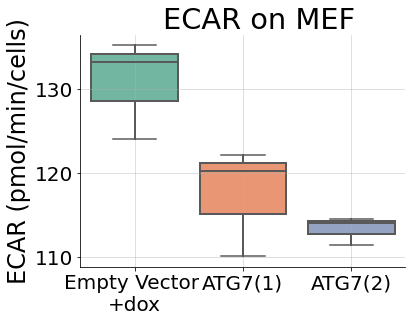

In [11]:
#Boxplot and Stats
Data = stats_data
shape = Data.shape
shape = shape[0]

#select the sample type column
Time = {'Time':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
Timedf = pandas.DataFrame(Time)
Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
Timedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(1,4)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'Empty Vector \n+dox'
data_distrib.loc[shape: shape*2,'x'] = 'ATG7(1)'
data_distrib.loc[shape*2:shape*3,'x'] = 'ATG7(2)'

#graph
seaborn.catplot(x="x", y="y", aspect= 1.25, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ECAR (pmol/min/cells)')
plt.xlabel('')
plt.title('ECAR on MEF', x=.55)
plt.grid(alpha = 0.5)

# # save
# path = 'ATG7/Seahorse_results/seahorse_ECAR/'
# plt.savefig(output_file_directory+path+'ecar_exp_2_normal.svg')


# +BAF

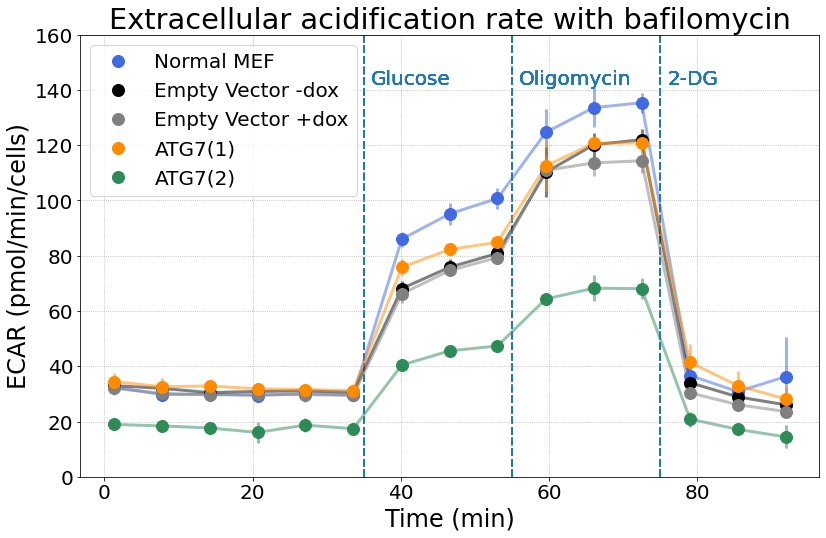

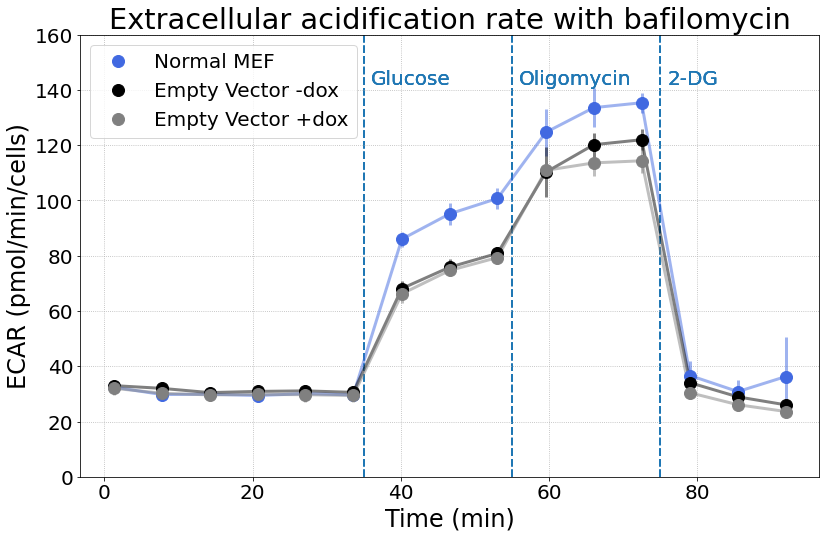

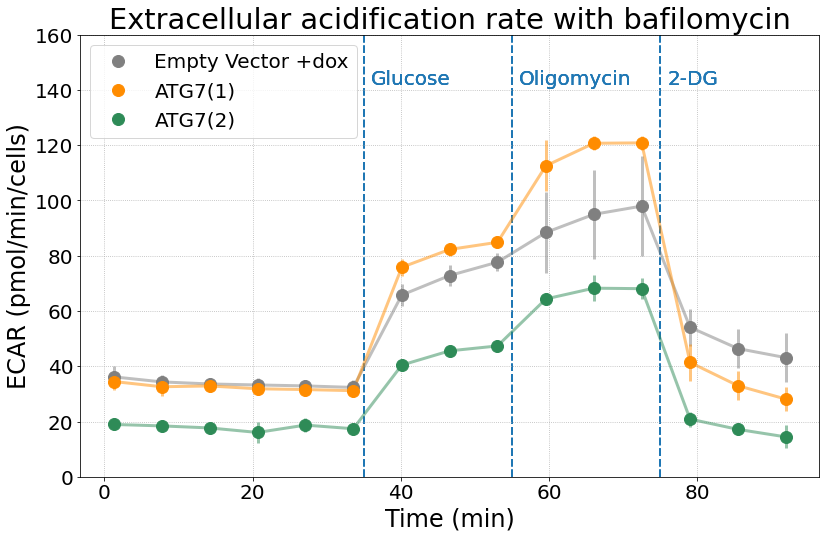

<Figure size 864x576 with 0 Axes>

In [12]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN

all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ecar_expNorm[sample_labels].mean()
        general_mean = ecar_expNorm[sample_labels].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ecar_expNorm[sample_labels]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ecar_expNorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ecar_expNorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 142, 'Glucose', color='tab:blue',fontsize=20)
        matplotlib.pyplot.text(56, 142, 'Oligomycin', color='tab:blue',fontsize=20)
        matplotlib.pyplot.text(76, 142, '2-DG', color='tab:blue',fontsize=20)

        ##settings
        matplotlib.pyplot.title('Extracellular acidification rate with bafilomycin')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('ECAR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2,fontsize=20)
        matplotlib.pyplot.ylim([0, 160])
        matplotlib.pyplot.tight_layout()
        
                # save the last graph
        path = 'ATG7/Seahorse_results/seahorse_ECAR/'
        text_file = 'graph_represent_exp2_baf'
        plt.savefig(output_file_directory+path+text_file+'.svg')
               
    plt.show()
    plt.clf()

In [16]:
#data preparation 
all_data = [[wt2_baf, 'ATG7(2)', "seagreen"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [normal_baf, 'Normal MEF', "royalblue"]]

stats_data = ecar_expNorm.iloc[9:12, :]
stats_data.reset_index(inplace = True, drop= True)

for data in all_data:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        
        df = stats_data[sample_labels]
        df[name_val] = df.mean(axis= 1)
        col = df.pop(name_val)
        stats_data.insert(1, name_val, col)

stats_data = stats_data.iloc[:, :6]
path = 'ATG7/Seahorse_results/seahorse_ECAR/'
stats_data.to_csv(output_file_directory+path+'ecar_exp2_df_baf.csv', header=True, index=False, sep=',')
stats_data

<ipython-input-16-7fc7c9384daf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_val] = df.mean(axis= 1)


,Time,Normal MEF,Empty Vector -dox,Empty Vector +dox,ATG7(1),ATG7(2)
0,59.58,124.053333,110.116667,111.4700,111.2300,64.2375
1,66.04,133.143333,120.180000,114.0275,120.3975,68.0825
2,72.50,135.178333,122.088333,114.4875,120.7150,67.8800


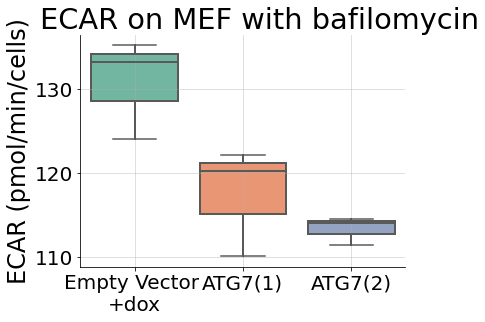

In [14]:
#Boxplot and Stats
Data = stats_data
shape = Data.shape
shape = shape[0]

#select the sample type column
Time = {'Time':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
Timedf = pandas.DataFrame(Time)
Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
Timedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(1,4)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'Empty Vector \n+dox'
data_distrib.loc[shape: shape*2,'x'] = 'ATG7(1)'
data_distrib.loc[shape*2:shape*3,'x'] = 'ATG7(2)'

#graph
seaborn.catplot(x="x", y="y", aspect= 1.25, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ECAR (pmol/min/cells)')
plt.xlabel('')
plt.title('ECAR on MEF with bafilomycin', x=.55)
plt.grid(alpha = 0.5)

# save
path = 'ATG7/Seahorse_results/seahorse_ECAR/'
plt.savefig(output_file_directory+path+'ecar_exp_2_bafilomycin.svg')
